# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

c:\Users\marci\.conda\envs\danalysis\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

Text(0.5, 0, 'Type of item')

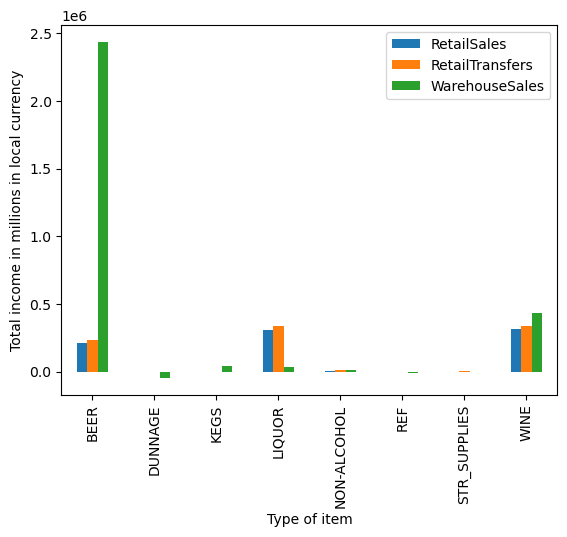

In [3]:
fig, ax = plt.subplots(1,1)
data[["ItemType","RetailSales","RetailTransfers","WarehouseSales"]].groupby("ItemType").sum().plot(kind="bar",ax=ax)
#ax.set_yscale("log")
ax.set_ylabel("Total income in millions in local currency")
ax.set_xlabel("Type of item")

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'BEER'),
  Text(1, 0, 'DUNNAGE'),
  Text(2, 0, 'KEGS'),
  Text(3, 0, 'LIQUOR'),
  Text(4, 0, 'NON-ALCOHOL'),
  Text(5, 0, 'REF'),
  Text(6, 0, 'STR_SUPPLIES'),
  Text(7, 0, 'WINE')])

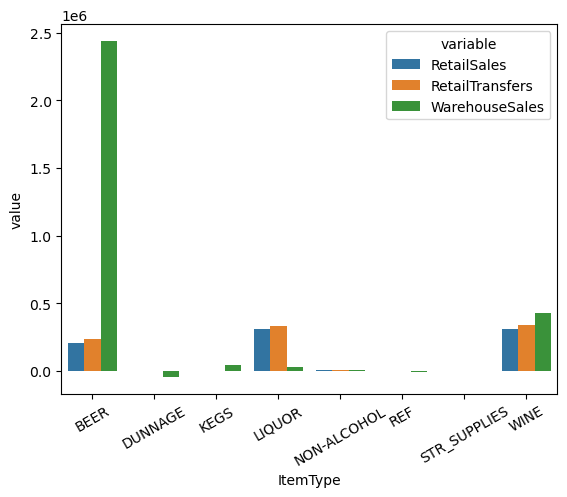

In [4]:
data["TotalSales"] = data["RetailSales"] + data["RetailTransfers"] + data["WarehouseSales"]
plot_data= data[["ItemType","RetailSales","RetailTransfers","WarehouseSales"]].groupby("ItemType").sum()
plot_data.reset_index(inplace=True)
dfm = plot_data.melt(id_vars='ItemType')
dfm
ax = sns.barplot(data=dfm, x='ItemType', y='value', hue='variable')
plt.sca(ax)
plt.xticks(rotation = 30) # Rotates X-Axis Ticks by 45-degrees


## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

<AxesSubplot: xlabel='Supplier'>

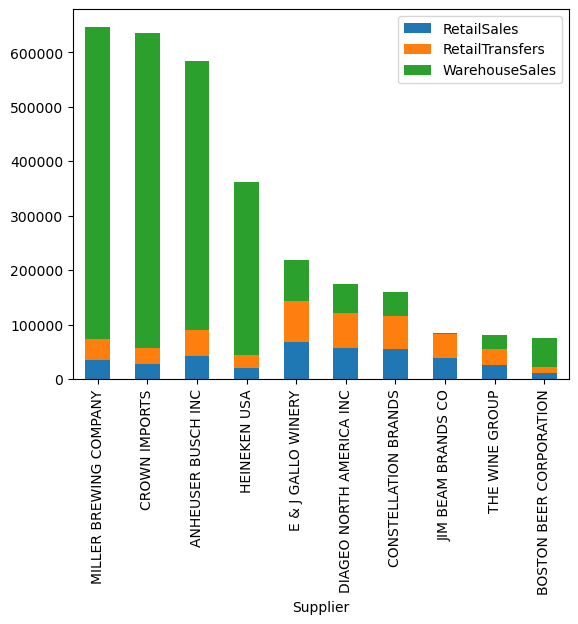

In [5]:
plotdata = data[["Supplier","RetailSales","RetailTransfers","WarehouseSales","TotalSales"]].groupby("Supplier").sum().sort_values("TotalSales",ascending=False).iloc[:10,:]
plotdata[["RetailSales","RetailTransfers","WarehouseSales"]].plot.bar(stacked=True)
#plotdata.groupby(['Supplier', 'TotalSales']).size().unstack()
#plotdata#.plot(kind='bar', stacked=True)
#plotdata.groupby("Supplier").sum().sort_values("TotalSales",ascending=False).iloc[:10,:].plot(kind="bar",stacked=True)
#plotdata= data.groupby("Supplier").sum().sort_values("TotalSales",ascending=False)
#plotdata = plotdata.iloc[:10,:]
#plotdata
#.groupby(['Supplier', 'TotalSales']).size().unstack().plot(kind='bar', stacked=True)
#fig, ax = plt.subplots(1,1)
#data[["ItemType","RetailSales","RetailTransfers","WarehouseSales"]].groupby("ItemType").sum().plot(kind="bar",ax=ax)
#ax.set_yscale("log")
#ax.set_ylabel("Total income in millions in local currency")
#ax.set_xlabel("Type of item")

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.


In [6]:
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales,TotalSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0,1.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0,1.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0,8.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0,2.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0,4.0


In [7]:
data["Year"].unique()

array([2017, 2018], dtype=int64)

In [8]:
plot_data= data.groupby(["Year","Month"]).mean()
plot_data

RetailSales  RetailTransfers  WarehouseSales  TotalSales
Year Month                                                          
2017 4         0.000000        15.707503        0.000000   15.707503
     5         7.038838         7.421817       27.310548   41.771203
     6         7.143914         6.950396       27.839069   41.933379
     8         6.409991         6.584726       28.122641   41.117358
     9         6.757254         6.419721       22.817909   35.994883
     10        6.549021         6.827827       22.289367   35.666215
     11        6.765496         7.103699       23.348862   37.218057
     12        9.078241         8.353759       21.169463   38.601463
2018 1         5.679413         5.574833       19.072137   30.326383
     2         5.939247         6.050136       20.229658   32.219040

<AxesSubplot: xlabel='Year,Month'>

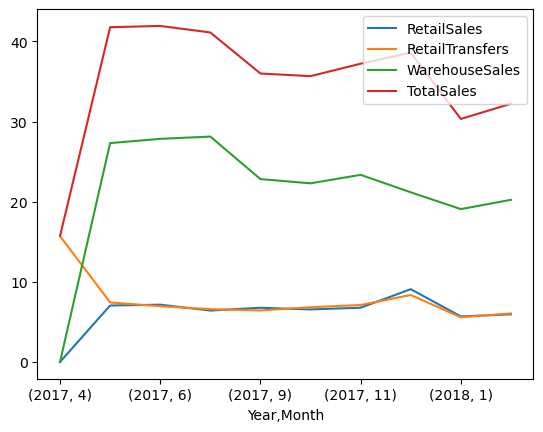

In [9]:
plot_data.plot(kind="line")

## 4. Plot the same information as above but as a bar chart.

<AxesSubplot: xlabel='Year,Month'>

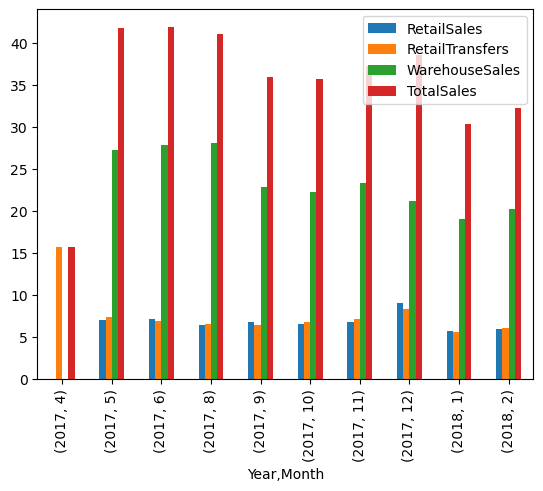

In [10]:
plot_data.plot(kind="bar")

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [11]:
data.head()
data["Date"] = data["Year"].astype(str) + "-" + data["Month"].astype(str)
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m")


ItemType
BEER            AxesSubplot(0.125,0.2;0.775x0.68)
DUNNAGE         AxesSubplot(0.125,0.2;0.775x0.68)
KEGS            AxesSubplot(0.125,0.2;0.775x0.68)
LIQUOR          AxesSubplot(0.125,0.2;0.775x0.68)
NON-ALCOHOL     AxesSubplot(0.125,0.2;0.775x0.68)
REF             AxesSubplot(0.125,0.2;0.775x0.68)
STR_SUPPLIES    AxesSubplot(0.125,0.2;0.775x0.68)
WINE            AxesSubplot(0.125,0.2;0.775x0.68)
Name: RetailSales, dtype: object

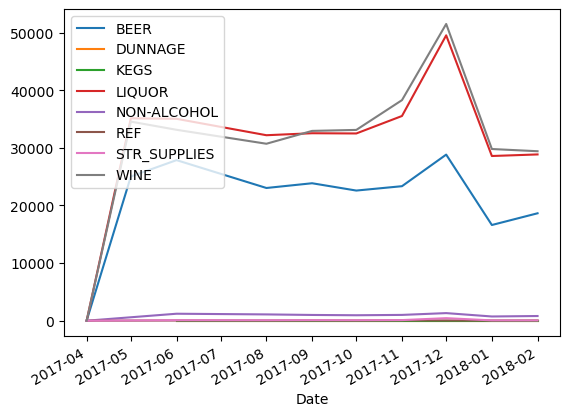

In [12]:
plot_data=  data.loc[:,["Date","ItemType","RetailSales"]].groupby(["Date","ItemType"]).sum()
plot_data.reset_index(inplace=True)
plot_data.set_index("Date", inplace=True)
plot_data.groupby("ItemType")["RetailSales"].plot(legend=True)
#plot_data.plot(kind="line",subplots=False)

## 6. Plot the same information as above but as a bar chart.

In [13]:
plot_data
plot_data.reset_index(inplace=True)

[Text(0, 0, '2017-04'),
 Text(1, 0, '2017-05'),
 Text(2, 0, '2017-06'),
 Text(3, 0, '2017-08'),
 Text(4, 0, '2017-09'),
 Text(5, 0, '2017-10'),
 Text(6, 0, '2017-11'),
 Text(7, 0, '2017-12'),
 Text(8, 0, '2018-01'),
 Text(9, 0, '2018-02')]

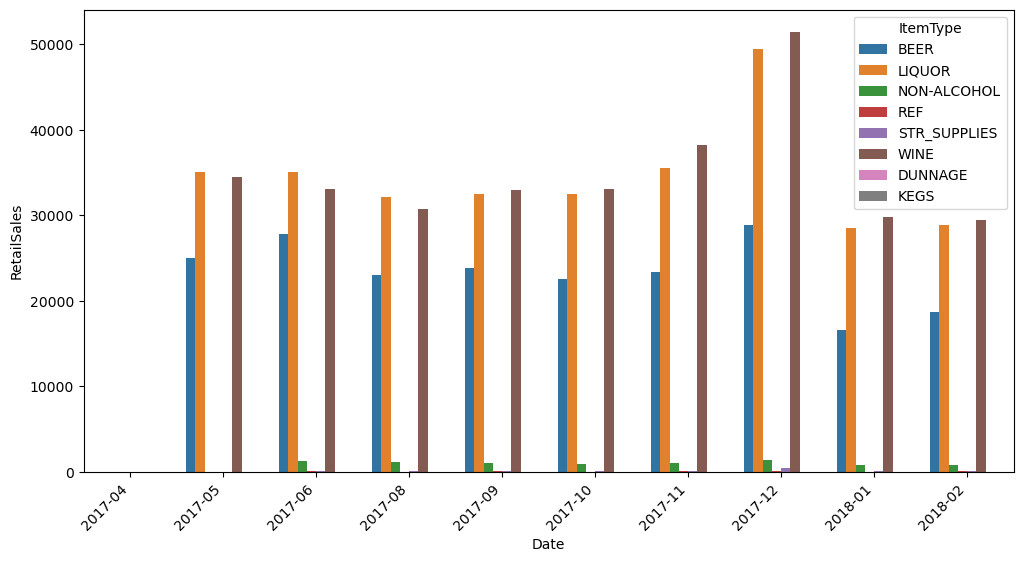

In [14]:
#plot_data["RetailSales"].plot(legend=True,kind="bar",stacked=True)
fig, ax = plt.subplots(figsize = (12,6))    
sns.barplot(x = "Date", y = "RetailSales", hue="ItemType", data = plot_data, 
                  estimator = sum, ci = None, ax=ax)
x_dates = plot_data['Date'].dt.strftime('%Y-%m').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

<AxesSubplot: xlabel='RetailSales', ylabel='RetailTransfers'>

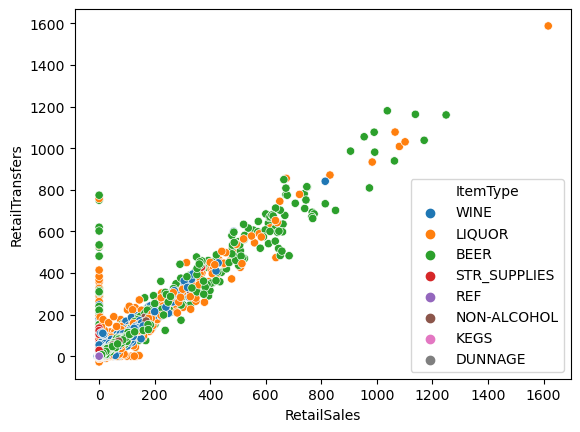

In [15]:
sns.scatterplot(x='RetailSales', y='RetailTransfers',hue="ItemType", data=data)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [16]:
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales,TotalSales,Date
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0,1.0,2017-04-01
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0,1.0,2017-04-01
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0,8.0,2017-04-01
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0,2.0,2017-04-01
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0,4.0,2017-04-01


KeyboardInterrupt: 

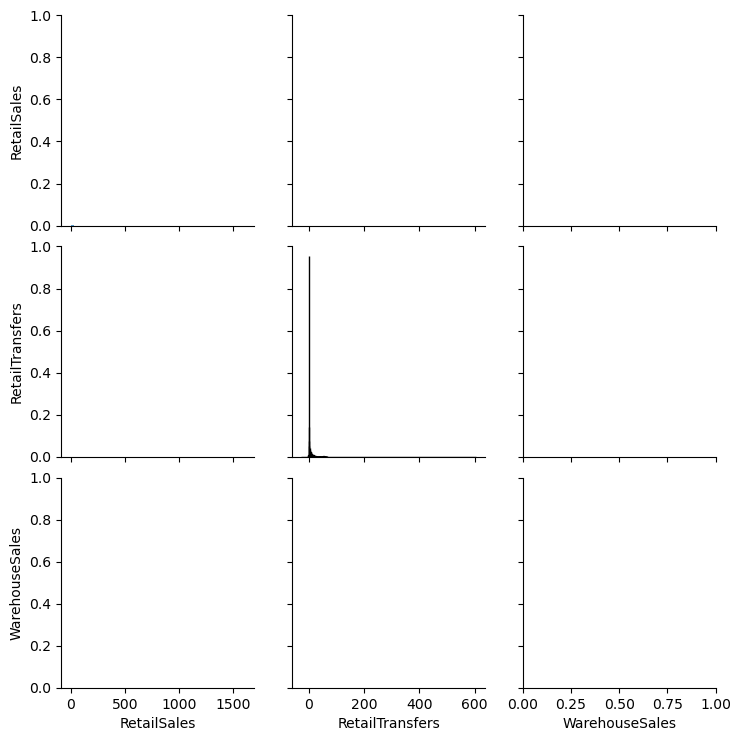

In [18]:
plot_data=data[["ItemType","RetailSales","RetailTransfers","WarehouseSales"]]
for col in plot_data.columns:
    if col!= "ItemType":
        plot_data[col] = plot_data[col].astype(float)
plot_data.head()
sns.pairplot(plot_data,diag_kind="hist")



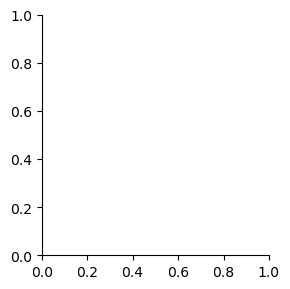

In [21]:
g = sns.FacetGrid(data)
